In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

In [3]:
#Cargamos el dataframe limpio
df = pd.read_csv("datos/SpotifyYtlimpio.csv")

<h2> Filtrado y Visualziación </h2>
<li>¿Cuáles son los valores únicos de la columna "album_type"? Cread tres dataframes diferentes, uno para cada tipo de "album_type". ¿Cuántas canciones tenemos en cada tipo?</li>

In [4]:
#Vemos los valores únicos de album type
df["album_type"].unique()

array(['album', 'single', 'compilation'], dtype=object)

In [5]:
df_album = df[df["album_type"] == "album"]
df_single = df[df["album_type"]== "single"]
df_compilation = df[df["album_type"] == "compilation"]

In [6]:
df_album.shape

(13845, 28)

In [7]:
df_single.shape

(4636, 28)

In [8]:
df_compilation.shape

(689, 28)

<li>Usando el dataframe de los albumes que hemos creado en el ejercicio anterior. ¿Cuál es la media y la desviación estándar de "danceability", "acousticness" y "speechiness" de cada artista?. Mostrad los resultados en tres dataframes diferentes, uno para cada métrica ("danceability", "acousticness" y "speechiness"). Ordenar los resultados de mayor a menor en base a la media.</li>

In [17]:
media_dc = df_album["danceability"].mean()
std_dc = df_album["danceability"].std()
media_ac = df_album["acousticness"].mean()
std_ac = df_album["acousticness"].std()
media_sp = df_album["speechiness"].mean()
std_sp = df_album["speechiness"].std()

In [15]:
data = {'media':[media_dc,media_ac,media_sp], 'std': [std_dc,std_ac,std_sp]}
df_data = pd.DataFrame.from_dict(data, orient='index', columns=['danceability', 'acousticness', 'speechiness']).round(2)

In [16]:
df_data

,danceability,acousticness,speechiness
media,0.61,0.29,0.09
std,0.17,0.29,0.11


<li>Se quiere estudiar si existe una relación entre la cantidad de visitas que reciben los videos de música de un artista en una plataforma de streaming y la cantidad de likes que estos videos obtienen. Por lo tanto, querremos contestar a la siguiente pregunta: ¿Son aquellos artistas que tienen más visitas los que más likes tienen? Para solucionar este ejercicio deberéis:<li>
<ul>
<li>Agrupar por artista y calcular la media de visitas y de likes</li>
</ul>

In [44]:
df_artist = df_album.groupby("artist")["views"].mean().round(2).reset_index()
df_artist1 = df_album.groupby("artist")["likes"].mean().round(2).reset_index()

In [45]:
dfmerge = df_artist.merge(df_artist1)

<li>Quedaros con los 10 artistas que más visitas han tenido.</li>

In [49]:
df_popviews = dfmerge.sort_values(by=['views'], ascending= False)
df_popviews_top =df_popviews.head(10)

In [50]:
df_poplikes = dfmerge.sort_values(by=["likes"], ascending= False)
df_poplikes_top = df_poplikes.head(10)

<li>Haced un subplot, donde en uno tengamos los 10 artistas con más likes y en el otro los 10 artistas con mas views.</li>

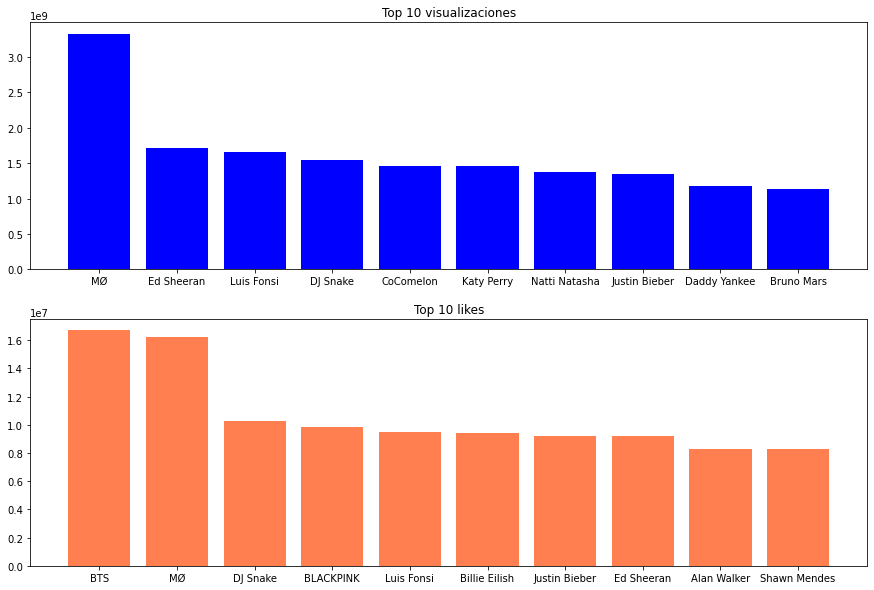

In [59]:
fig,ax = plt.subplots(2,1, figsize = (15,10))
ax[0].bar(df_popviews_top["artist"],df_popviews_top["views"], color = "blue")
ax[1].bar(df_poplikes_top["artist"], df_poplikes_top["likes"], color ="coral")
ax[0].set_title("Top 10 visualizaciones")
ax[1].set_title("Top 10 likes")
plt.show()

<li>BONUS Haced lo mismo para los datos de tipo "single".</li>

<p>Ahora queremos analizar la colaboración entre artistas en la industria musical, se tienen datos de las colaboraciones realizadas en los últimos años. Se desea conocer cuáles son los artistas que han colaborado en mayor cantidad de canciones y generar un ranking con los diez primeros. ¿Qué artistas con los que más colaboraciones tienen? Para esto tendréis que:</p>
<li>Filtrad los datos para quedaros solo con aquellos datos donde en la columna "track" tengamos "feat".</li>

In [60]:
patron = "feat"
colaboraciones = df[df["track"].str.contains(patron, regex= True)]
colaboraciones.head()

,Unnamed: 0,artist,url_spotify,track,album,album_type,uri,danceability,energy,key,...,url_youtube,title,channel,views,likes,comments,description,licensed,official_video,stream
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,new gold (feat. tame impala and bootie brown),new gold (feat. tame impala and bootie brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.69,0.92,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,gorillaz - new gold ft. tame impala & bootie b...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,63063467.0
6,6,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,new gold (feat. tame impala and bootie brown) ...,new gold (feat. tame impala and bootie brown) ...,single,spotify:track:2c3KCGq6UojB2c8UAFrRON,0.72,0.90,4.0,...,https://www.youtube.com/watch?v=BONNm0F7Tto,"gorillaz - new gold ft. tame impala, bootie br...",Dom Dolla,451996.0,11686.0,241.0,"Gorillaz 'New Gold' ft. Tame Impala, Bootie Br...",False,True,10666154.0
7,7,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,she's my collar (feat. kali uchis),humanz (deluxe),album,spotify:track:3lIxtCaROdRDuTnNBDm3n2,0.73,0.81,11.0,...,https://www.youtube.com/watch?v=f8NwLXYIHS4,gorillaz - she's my collar [hq],SalvaMuñox,1010982.0,17675.0,260.0,𝐁̲𝐎̲𝐍̲𝐔̲𝐒̲:̲ Hu̳ma̳n̳z [̲̠̲𝐃̲̠̲𝐄̲̠̲𝐅̲̠̲𝐈̲̠̲𝐍̲̠...,False,False,159605929.0
8,8,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,cracker island (feat. thundercat),cracker island (feat. thundercat),single,spotify:track:2W3ZpQg9i6lE6kmHbcdu9N,0.74,0.91,2.0,...,https://www.youtube.com/watch?v=S03T47hapAc,gorillaz - cracker island ft. thundercat (offi...,Gorillaz,24459820.0,739527.0,20296.0,Listen to Cracker Island: https://gorillaz.lnk...,True,True,42671901.0
27,27,50 Cent,https://open.spotify.com/artist/3q7HBObVc0L8jN...,is this love ('09) (feat. 50 cent),curtain call 2,album,spotify:track:7rK0iM6jwuo1oizdx8suQA,0.85,0.78,8.0,...,https://www.youtube.com/watch?v=Zl64MRAqQxk,"eminem, 50 cent - is this love ('09) [visualizer]",EminemVEVO,5289821.0,245935.0,9008.0,"Listen to ""Curtain Call 2"": \nhttps://Eminem.l...",True,True,28529840.0


<li>Contad cuantas canciones tiene cada artista utilizando el dataframe generado en el paso anterior.</li>

In [81]:
df_colab = colaboraciones.groupby("artist")["track"].count().reset_index()

In [83]:
df_colab = df_colab.sort_values(by=["track"], ascending = False)

In [84]:
df_colab_top = df_colab.head(10)
df_colab_top

,artist,track
387,Macklemore,10
293,Juicy J,10
625,Ty Dolla ign,9
134,DJ Khaled,9
646,Wu-Tang Clan,9
46,B.o.B,8
645,Wizkid,8
121,Clean Bandit,8
637,Wale,8
498,Popcaan,8


<li>Mostrad los resultados en una gráfica, seleccionado los 10 artistas con más colaboraciones.</li>

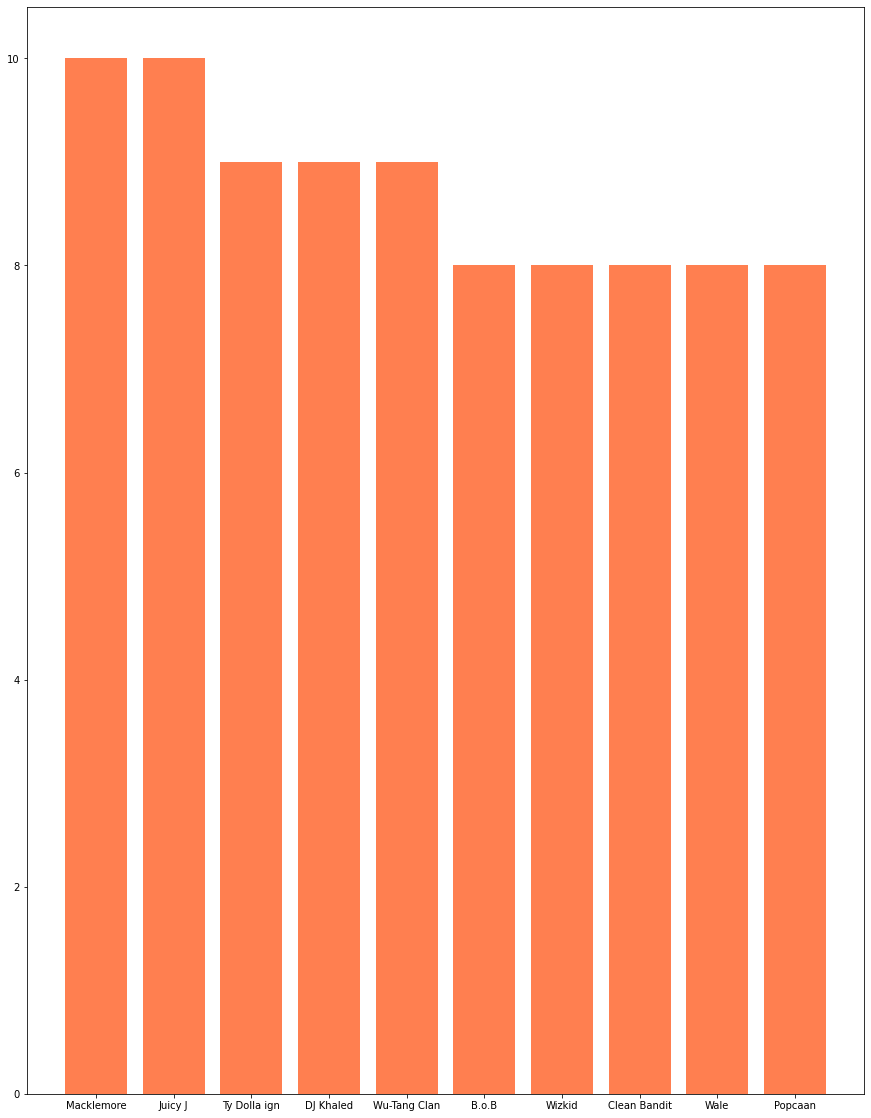

In [88]:
plt.figure(figsize=(15,20))
plt.bar(df_colab_top["artist"], df_colab_top["track"], color = 'coral')
plt.show()